In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
import math
import time

from sklearn.decomposition import PCA

pd.set_option('display.expand_frame_repr', False)
%matplotlib inline


# CS-E4650 Methods of Data mining

# Exercise session 1

## Data types: Read the description and specify data types of all variables.

Categorical:

* gender binary (nominal)

* femstate nominal

* sulcer ordinal

* kmethod nominal

* place nominal

Numerical:

* Ratio scale

    * weight, adrenal, liver, heart, appendix, gonfat, bat - all weights

    * tail, blenght, intestine - all lengths
    
    * ADWBWind, gonind - ratio variables

* Interval scale (zero point on the scale is not meaningful)
    
    * year - the last digit of the year and all years are on the same decade

Interval circular (ordered categories, last category precedes the first):

* day


## Handling missing values: It is safest to remove missing values, but try to keep as many features as possible and as many rats with the stomach ulcer as possible. (Another solution is imputation, studied in the extra task.)


a) Remove columns that have so many missing values that they can’t
be used.


In [218]:
# Load data from "ratdataRaw.csv", save raw data to variable orginal_data and data
data_path = "ratdataRaw.csv"
original_data = data = pd.read_csv(data_path)
data

,id,day,weight,gender,adrenal,liver,heart,appendix,femstate,gonfat,bat,sulcer,kmethod,tail,blength,place,intestine,year,ADWBWind,gonind
0,rat1,67,22.0,1,10.0,0.8,0.112,0.3,4,0.00,0.041,1,3,7.5,10.5,2,,5,0.454545,0.000000
1,rat2,251,182.0,1,55.0,1.9,0.8,1.6,4,4.20,0.135,3,3,13.0,19.5,1,,3,0.302198,1.648659
2,rat3,230,37.5,1,24.5,1.92,0.23,0.78,4,0.00,0.055,2,1,9.5,10.5,3,82,8,0.653333,0.000000
3,rat4,261,45.0,2,11.7,2.13,0.25,4.73,,13.20,0.098,1,1,10.0,11.5,9,,2,0.260000,2.653242
4,rat5,262,43.0,1,21.5,2.26,0.23,0.93,4,0.00,0.081,1,1,9.0,12.5,3,85,8,0.500000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
573,rat576,169,416.0,1,195.5,32.99,1.63,6.14,1,1.70,0.556,1,1,17.5,23.0,3,196,7,0.469952,0.993252
574,rat577,244,476.0,1,181.0,38.41,2.04,4.19,2,3.54,0.758,1,1,17.5,24.5,3,191,8,0.380252,1.512927
575,rat578,230,459.0,1,237.5,39.13,1.69,7.41,2,0.50,0.559,1,1,20.0,24.5,3,226,8,0.517429,0.405465
576,rat579,75,299.0,2,50.8,,,,,2.51,0.337,1,1,17.5,21.3,4,,,0.169900,1.255616


In [219]:
# Find all values with NaN
data.isna().sum()

id           0
day          0
weight       0
gender       0
adrenal      0
liver        0
heart        0
appendix     0
femstate     0
gonfat       0
bat          0
sulcer       0
kmethod      0
tail         0
blength      0
place        0
intestine    0
year         0
ADWBWind     0
gonind       0
dtype: int64

In [220]:
# Does not work, one reason is to due to data format, this issue is very common in real data, 
# especially those data that are combined from different sources and human mannually type in the data
# try different trick/method

# Find amount of missing data in each column
missing = {}
for i in data.columns:
    emptyIndex = data[data[i] == ' ']
    missing[i] = len(emptyIndex)
print(missing)

{'id': 0, 'day': 0, 'weight': 0, 'gender': 0, 'adrenal': 0, 'liver': 11, 'heart': 11, 'appendix': 11, 'femstate': 224, 'gonfat': 0, 'bat': 0, 'sulcer': 0, 'kmethod': 0, 'tail': 0, 'blength': 0, 'place': 0, 'intestine': 191, 'year': 44, 'ADWBWind': 0, 'gonind': 0}


In [221]:
# Intestine feature has 191 missing values which is 191/578 = 33% of total number of rows so it is reasonable to delete this feature
data = data.drop('intestine', axis=1)
len(data.columns)

19

b) Remove rats that have missing values in the features that are
defined for them. (Note that female rats have more features than
male rats.)

- Remove rats 23, 33, 34, 189, 190, 459, 460, 485, 486, 579, 580 (many missing values) and 12, 
(female with missing femstate)


In [222]:
# Find indices of all empty values in all features
for i in data.columns:
    emptyIndex = data[data[i] == ' '].index
    print(i, emptyIndex)

id Int64Index([], dtype='int64')
day Int64Index([], dtype='int64')
weight Int64Index([], dtype='int64')
gender Int64Index([], dtype='int64')
adrenal Int64Index([], dtype='int64')
liver Int64Index([22, 32, 33, 188, 189, 456, 457, 482, 483, 576, 577], dtype='int64')
heart Int64Index([22, 32, 33, 188, 189, 456, 457, 482, 483, 576, 577], dtype='int64')
appendix Int64Index([22, 32, 33, 188, 189, 456, 457, 482, 483, 576, 577], dtype='int64')
femstate Int64Index([  3,   6,   7,  10,  11,  12,  13,  15,  16,  17,
            ...
            492, 495, 498, 503, 517, 527, 529, 545, 576, 577],
           dtype='int64', length=224)
gonfat Int64Index([], dtype='int64')
bat Int64Index([], dtype='int64')
sulcer Int64Index([], dtype='int64')
kmethod Int64Index([], dtype='int64')
tail Int64Index([], dtype='int64')
blength Int64Index([], dtype='int64')
place Int64Index([], dtype='int64')
year Int64Index([ 32,  33,  90, 105, 106, 117, 143, 172, 174, 180, 181, 184, 186,
            187, 188, 189, 191, 204

In [223]:
idx = [22, 32, 33, 188, 189, 456, 457, 482, 483, 576, 577]
data.loc[idx][['id']]

,id
22,rat23
32,rat33
33,rat34
188,rat189
189,rat190
456,rat459
457,rat460
482,rat485
483,rat486
576,rat579


In [224]:
# remove those rows
data = data.drop(idx)
data

,id,day,weight,gender,adrenal,liver,heart,appendix,femstate,gonfat,bat,sulcer,kmethod,tail,blength,place,year,ADWBWind,gonind
0,rat1,67,22.0,1,10.0,0.8,0.112,0.3,4,0.00,0.041,1,3,7.5,10.5,2,5,0.454545,0.000000
1,rat2,251,182.0,1,55.0,1.9,0.8,1.6,4,4.20,0.135,3,3,13.0,19.5,1,3,0.302198,1.648659
2,rat3,230,37.5,1,24.5,1.92,0.23,0.78,4,0.00,0.055,2,1,9.5,10.5,3,8,0.653333,0.000000
3,rat4,261,45.0,2,11.7,2.13,0.25,4.73,,13.20,0.098,1,1,10.0,11.5,9,2,0.260000,2.653242
4,rat5,262,43.0,1,21.5,2.26,0.23,0.93,4,0.00,0.081,1,1,9.0,12.5,3,8,0.500000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
571,rat574,127,442.0,1,164.5,29.94,1.55,5.99,3,4.71,1.150,1,1,19.8,24.5,3,7,0.372172,1.742219
572,rat575,269,381.8,1,145.5,30,1.4,5.6,4,1.90,0.395,1,1,17.1,22.0,3,6,0.381090,1.064711
573,rat576,169,416.0,1,195.5,32.99,1.63,6.14,1,1.70,0.556,1,1,17.5,23.0,3,7,0.469952,0.993252
574,rat577,244,476.0,1,181.0,38.41,2.04,4.19,2,3.54,0.758,1,1,17.5,24.5,3,8,0.380252,1.512927


In [225]:
# rats 12, 520 (female with missing femstate)
idx  = data.loc[(data['gender'] == 1) & (data['femstate'] == ' ')].index 
data.loc[idx][['id']]

,id
11,rat12
517,rat520


In [226]:
# remove those rows
data = data.drop(idx)
data

,id,day,weight,gender,adrenal,liver,heart,appendix,femstate,gonfat,bat,sulcer,kmethod,tail,blength,place,year,ADWBWind,gonind
0,rat1,67,22.0,1,10.0,0.8,0.112,0.3,4,0.00,0.041,1,3,7.5,10.5,2,5,0.454545,0.000000
1,rat2,251,182.0,1,55.0,1.9,0.8,1.6,4,4.20,0.135,3,3,13.0,19.5,1,3,0.302198,1.648659
2,rat3,230,37.5,1,24.5,1.92,0.23,0.78,4,0.00,0.055,2,1,9.5,10.5,3,8,0.653333,0.000000
3,rat4,261,45.0,2,11.7,2.13,0.25,4.73,,13.20,0.098,1,1,10.0,11.5,9,2,0.260000,2.653242
4,rat5,262,43.0,1,21.5,2.26,0.23,0.93,4,0.00,0.081,1,1,9.0,12.5,3,8,0.500000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
571,rat574,127,442.0,1,164.5,29.94,1.55,5.99,3,4.71,1.150,1,1,19.8,24.5,3,7,0.372172,1.742219
572,rat575,269,381.8,1,145.5,30,1.4,5.6,4,1.90,0.395,1,1,17.1,22.0,3,6,0.381090,1.064711
573,rat576,169,416.0,1,195.5,32.99,1.63,6.14,1,1.70,0.556,1,1,17.5,23.0,3,7,0.469952,0.993252
574,rat577,244,476.0,1,181.0,38.41,2.04,4.19,2,3.54,0.758,1,1,17.5,24.5,3,8,0.380252,1.512927


In [227]:
# data.to_csv("rats_ex1_q2.csv")

## Simple feature extraction/transformation:

a) Feature ADWBWind is the weight of the adrenal gland divided
by the body weight. Do a similar normalization for other weights
of organs and fat. Let the new features be “liverind”, “heartind”,
“appendixind”, “gonfatind” and “batind”.


In [228]:
# normalize all organ (adrenal, liver, heart, appendix) and fat weights (gonfat, bat) by body weight 

def normalize_by_weight(data, features = ['adrenal', 'liver', 'heart', 'appendix', 'gonfat', 'bat']):
    for i in features:
        feature_name =  str(i) + 'ind'
        #print(feature_name)
        data[feature_name] = data[i].astype(float) / data['weight'].astype(float)
    return data
        

In [229]:
df = normalize_by_weight(data)
data = df
data

,id,day,weight,gender,adrenal,liver,heart,appendix,femstate,gonfat,...,place,year,ADWBWind,gonind,adrenalind,liverind,heartind,appendixind,gonfatind,batind
0,rat1,67,22.0,1,10.0,0.8,0.112,0.3,4,0.00,...,2,5,0.454545,0.000000,0.454545,0.036364,0.005091,0.013636,0.000000,0.001864
1,rat2,251,182.0,1,55.0,1.9,0.8,1.6,4,4.20,...,1,3,0.302198,1.648659,0.302198,0.010440,0.004396,0.008791,0.023077,0.000742
2,rat3,230,37.5,1,24.5,1.92,0.23,0.78,4,0.00,...,3,8,0.653333,0.000000,0.653333,0.051200,0.006133,0.020800,0.000000,0.001467
3,rat4,261,45.0,2,11.7,2.13,0.25,4.73,,13.20,...,9,2,0.260000,2.653242,0.260000,0.047333,0.005556,0.105111,0.293333,0.002178
4,rat5,262,43.0,1,21.5,2.26,0.23,0.93,4,0.00,...,3,8,0.500000,0.000000,0.500000,0.052558,0.005349,0.021628,0.000000,0.001884
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
571,rat574,127,442.0,1,164.5,29.94,1.55,5.99,3,4.71,...,3,7,0.372172,1.742219,0.372172,0.067738,0.003507,0.013552,0.010656,0.002602
572,rat575,269,381.8,1,145.5,30,1.4,5.6,4,1.90,...,3,6,0.381090,1.064711,0.381090,0.078575,0.003667,0.014667,0.004976,0.001035
573,rat576,169,416.0,1,195.5,32.99,1.63,6.14,1,1.70,...,3,7,0.469952,0.993252,0.469952,0.079303,0.003918,0.014760,0.004087,0.001337
574,rat577,244,476.0,1,181.0,38.41,2.04,4.19,2,3.54,...,3,8,0.380252,1.512927,0.380252,0.080693,0.004286,0.008803,0.007437,0.001592


b) Normalize tail length by dividing with the body length. Let the
new feature be “tailind”.

In [230]:
data['tailind']  = data['tail'].astype(float) / data['blength'].astype(float)
data

,id,day,weight,gender,adrenal,liver,heart,appendix,femstate,gonfat,...,year,ADWBWind,gonind,adrenalind,liverind,heartind,appendixind,gonfatind,batind,tailind
0,rat1,67,22.0,1,10.0,0.8,0.112,0.3,4,0.00,...,5,0.454545,0.000000,0.454545,0.036364,0.005091,0.013636,0.000000,0.001864,0.714286
1,rat2,251,182.0,1,55.0,1.9,0.8,1.6,4,4.20,...,3,0.302198,1.648659,0.302198,0.010440,0.004396,0.008791,0.023077,0.000742,0.666667
2,rat3,230,37.5,1,24.5,1.92,0.23,0.78,4,0.00,...,8,0.653333,0.000000,0.653333,0.051200,0.006133,0.020800,0.000000,0.001467,0.904762
3,rat4,261,45.0,2,11.7,2.13,0.25,4.73,,13.20,...,2,0.260000,2.653242,0.260000,0.047333,0.005556,0.105111,0.293333,0.002178,0.869565
4,rat5,262,43.0,1,21.5,2.26,0.23,0.93,4,0.00,...,8,0.500000,0.000000,0.500000,0.052558,0.005349,0.021628,0.000000,0.001884,0.720000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
571,rat574,127,442.0,1,164.5,29.94,1.55,5.99,3,4.71,...,7,0.372172,1.742219,0.372172,0.067738,0.003507,0.013552,0.010656,0.002602,0.808163
572,rat575,269,381.8,1,145.5,30,1.4,5.6,4,1.90,...,6,0.381090,1.064711,0.381090,0.078575,0.003667,0.014667,0.004976,0.001035,0.777273
573,rat576,169,416.0,1,195.5,32.99,1.63,6.14,1,1.70,...,7,0.469952,0.993252,0.469952,0.079303,0.003918,0.014760,0.004087,0.001337,0.760870
574,rat577,244,476.0,1,181.0,38.41,2.04,4.19,2,3.54,...,8,0.380252,1.512927,0.380252,0.080693,0.004286,0.008803,0.007437,0.001592,0.714286


c) Calculate a new feature, BMI (body mass index), as BMI = weight/blength2


In [231]:
data['BMI']  = data['weight'].astype(float) / data['blength'].astype(float)**2
data

,id,day,weight,gender,adrenal,liver,heart,appendix,femstate,gonfat,...,ADWBWind,gonind,adrenalind,liverind,heartind,appendixind,gonfatind,batind,tailind,BMI
0,rat1,67,22.0,1,10.0,0.8,0.112,0.3,4,0.00,...,0.454545,0.000000,0.454545,0.036364,0.005091,0.013636,0.000000,0.001864,0.714286,0.199546
1,rat2,251,182.0,1,55.0,1.9,0.8,1.6,4,4.20,...,0.302198,1.648659,0.302198,0.010440,0.004396,0.008791,0.023077,0.000742,0.666667,0.478632
2,rat3,230,37.5,1,24.5,1.92,0.23,0.78,4,0.00,...,0.653333,0.000000,0.653333,0.051200,0.006133,0.020800,0.000000,0.001467,0.904762,0.340136
3,rat4,261,45.0,2,11.7,2.13,0.25,4.73,,13.20,...,0.260000,2.653242,0.260000,0.047333,0.005556,0.105111,0.293333,0.002178,0.869565,0.340265
4,rat5,262,43.0,1,21.5,2.26,0.23,0.93,4,0.00,...,0.500000,0.000000,0.500000,0.052558,0.005349,0.021628,0.000000,0.001884,0.720000,0.275200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
571,rat574,127,442.0,1,164.5,29.94,1.55,5.99,3,4.71,...,0.372172,1.742219,0.372172,0.067738,0.003507,0.013552,0.010656,0.002602,0.808163,0.736360
572,rat575,269,381.8,1,145.5,30,1.4,5.6,4,1.90,...,0.381090,1.064711,0.381090,0.078575,0.003667,0.014667,0.004976,0.001035,0.777273,0.788843
573,rat576,169,416.0,1,195.5,32.99,1.63,6.14,1,1.70,...,0.469952,0.993252,0.469952,0.079303,0.003918,0.014760,0.004087,0.001337,0.760870,0.786389
574,rat577,244,476.0,1,181.0,38.41,2.04,4.19,2,3.54,...,0.380252,1.512927,0.380252,0.080693,0.004286,0.008803,0.007437,0.001592,0.714286,0.793003


d) Create a new binary variable, “mother”, that is 1 for all female
rats who are either pregnant, nursing or both, and 0 for other rats.

In [232]:
mother_index = data.loc[(data['femstate'] != '4') & (data['femstate'] != ' ') ].index
mother_index

Int64Index([ 77,  97, 109, 127, 136, 140, 145, 152, 165, 170,
            ...
            564, 565, 567, 568, 569, 570, 571, 573, 574, 575],
           dtype='int64', length=197)

In [233]:
female_not_mother_index = data.loc[data['femstate'] == '4'].index
female_not_mother_index

Int64Index([  0,   1,   2,   4,   5,   8,   9,  14,  21,  25,
            ...
            497, 506, 509, 514, 518, 533, 534, 547, 566, 572],
           dtype='int64', length=157)

In [234]:
male_index = data.loc[(data['gender'] == 2) ].index
male_index

Int64Index([  3,   6,   7,  10,  12,  13,  15,  16,  17,  18,
            ...
            474, 479, 484, 492, 495, 498, 503, 527, 529, 545],
           dtype='int64', length=211)

In [235]:
197+157+211

565

In [236]:
data.loc[mother_index,'mother'] = 1
data.loc[female_not_mother_index,'mother'] = 0
data.loc[male_index,'mother'] = 0
data.mother = data.mother.astype(int)
data.loc[105:115,['id','gender', 'femstate','mother']]

,id,gender,femstate,mother
105,rat106,1,4,0
106,rat107,1,4,0
107,rat108,2,,0
108,rat109,2,,0
109,rat110,1,1,1
110,rat111,1,4,0
111,rat112,2,,0
112,rat113,2,,0
113,rat114,1,4,0
114,rat115,1,4,0


In [237]:
data

,id,day,weight,gender,adrenal,liver,heart,appendix,femstate,gonfat,...,gonind,adrenalind,liverind,heartind,appendixind,gonfatind,batind,tailind,BMI,mother
0,rat1,67,22.0,1,10.0,0.8,0.112,0.3,4,0.00,...,0.000000,0.454545,0.036364,0.005091,0.013636,0.000000,0.001864,0.714286,0.199546,0
1,rat2,251,182.0,1,55.0,1.9,0.8,1.6,4,4.20,...,1.648659,0.302198,0.010440,0.004396,0.008791,0.023077,0.000742,0.666667,0.478632,0
2,rat3,230,37.5,1,24.5,1.92,0.23,0.78,4,0.00,...,0.000000,0.653333,0.051200,0.006133,0.020800,0.000000,0.001467,0.904762,0.340136,0
3,rat4,261,45.0,2,11.7,2.13,0.25,4.73,,13.20,...,2.653242,0.260000,0.047333,0.005556,0.105111,0.293333,0.002178,0.869565,0.340265,0
4,rat5,262,43.0,1,21.5,2.26,0.23,0.93,4,0.00,...,0.000000,0.500000,0.052558,0.005349,0.021628,0.000000,0.001884,0.720000,0.275200,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
571,rat574,127,442.0,1,164.5,29.94,1.55,5.99,3,4.71,...,1.742219,0.372172,0.067738,0.003507,0.013552,0.010656,0.002602,0.808163,0.736360,1
572,rat575,269,381.8,1,145.5,30,1.4,5.6,4,1.90,...,1.064711,0.381090,0.078575,0.003667,0.014667,0.004976,0.001035,0.777273,0.788843,0
573,rat576,169,416.0,1,195.5,32.99,1.63,6.14,1,1.70,...,0.993252,0.469952,0.079303,0.003918,0.014760,0.004087,0.001337,0.760870,0.786389,1
574,rat577,244,476.0,1,181.0,38.41,2.04,4.19,2,3.54,...,1.512927,0.380252,0.080693,0.004286,0.008803,0.007437,0.001592,0.714286,0.793003,1


In [238]:
# data.to_csv("rats_ex1_q3.csv")

##  Plotting and studying distributions:

a) Plot histograms of features blength, heart, BMI and liverind. (Set
a sufficiently large number of bins.) Check extreme outliers if you
can find errors. There should be at least four rats with clear errors
(two are obvious, for the other two you need to look at multiple
fields). Remove these rats.

On Task 4a) Identifying errors (after plotting at least  blength, heart,
BMI and liverind)
* blength:  rat300 has blength=21522cm = 21.5m! 
* heart: rat120 has heart=1004g=1.004kg! (but weight=253g)
* BMI: 3-4 outliers, rat300, rat183, rat434, and possibly rat1
- rat300 already removed
- rat183 has weight=26.7g (baby) but blength=23cm (adult).
Also tail length and organ weights are of adult magnitude. (Maybe the real
weight is 267g, but since ncertain, remove the rat.)
- rat434 has weight 55g, but blength 20.5cm, so looks suspicious for
the same reason - see below
- rat1 doesn't show any obvious errors - maybe just so thin?
* liverind: 2 huge values
- rat183 (already removed)
- rat434 that we already suspected. Liver weight 17.01g is itself in an
acceptable range (not an outlier), but it is not proportional to the body
weigh (30% of the weight). (Maybe the weight and date values have got
changed, but since unknown, remove the rat.)


In [239]:
data['blength'] = data['blength'].astype('float')
data['heart'] = data['heart'].astype('float')
data['BMI'] = data['BMI'].astype('float')
data['liverind'] = data['liverind'].astype('float')

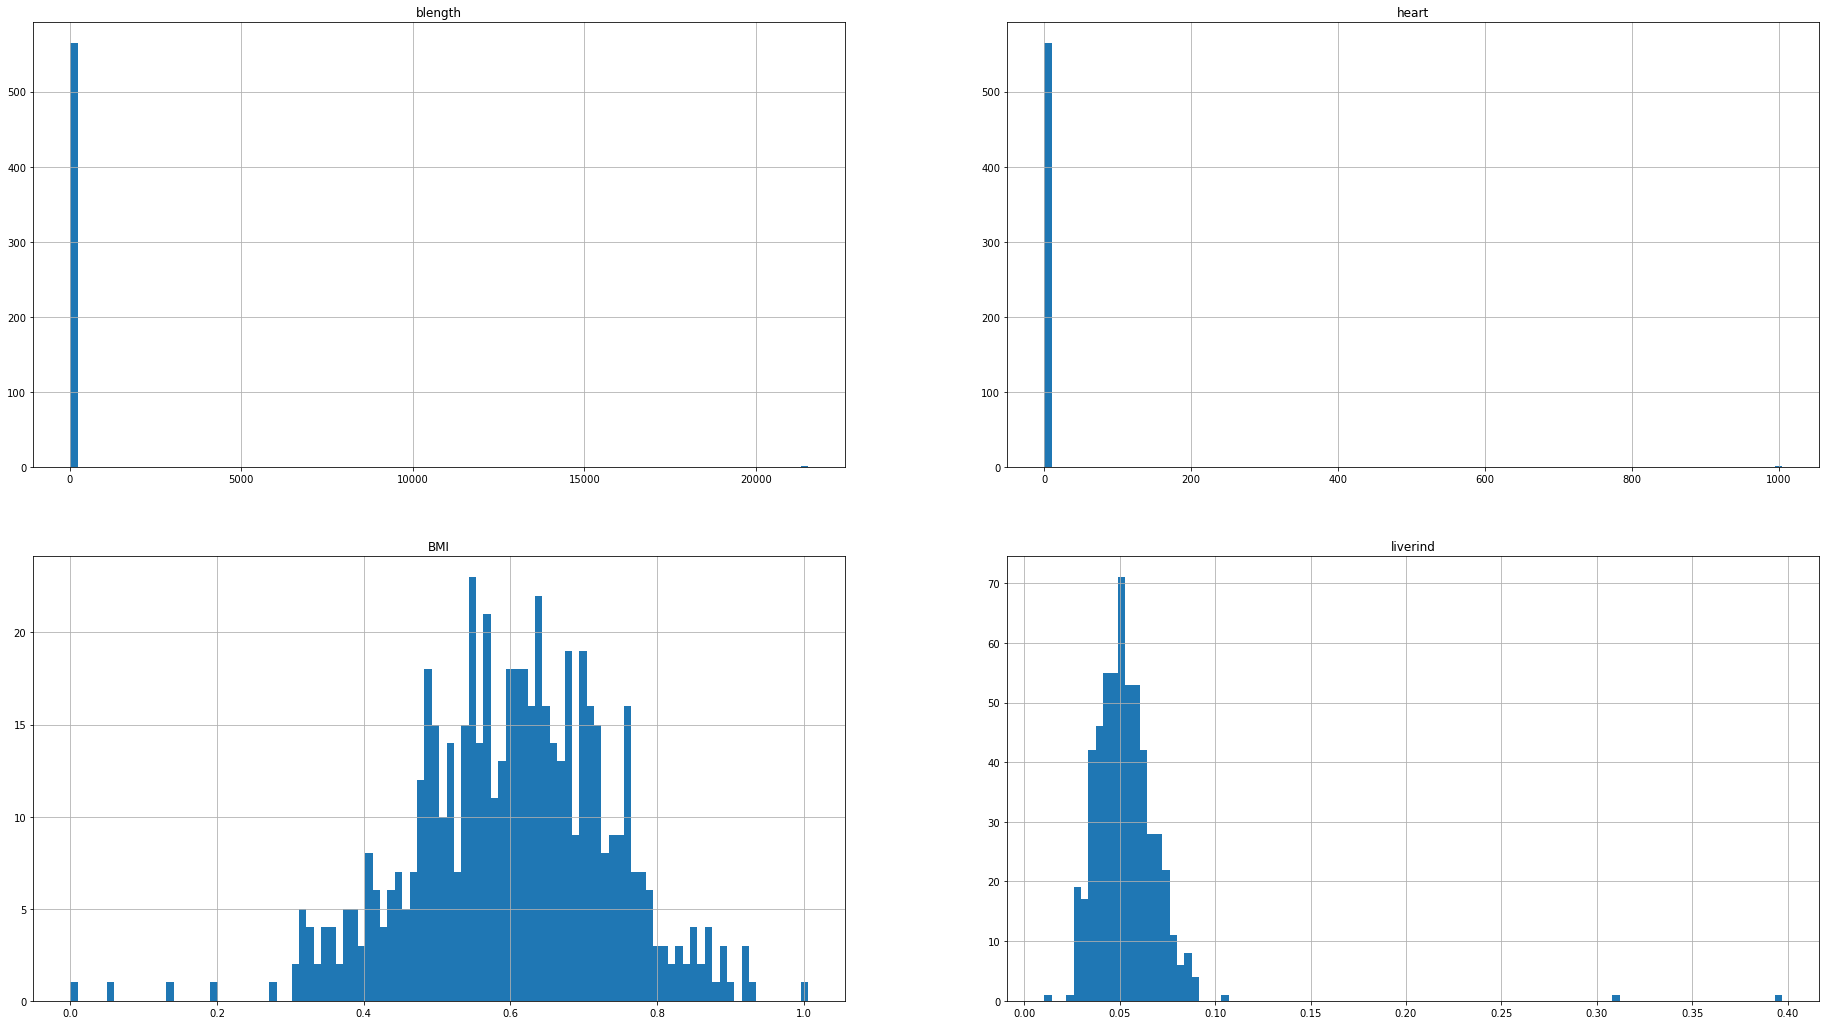

In [240]:
fig, ax = plt.subplots(figsize=(32,18))
plt.subplot(2,2,1)
data['blength'].hist(bins=100)
plt.title('blength')
plt.subplot(2,2,2)
data['heart'].hist(bins=100)
plt.title('heart')
plt.subplot(2,2,3)
data['BMI'].hist(bins=100)
plt.title('BMI')
plt.subplot(2,2,4)
data['liverind'].hist(bins=100)
plt.title('liverind')
plt.show()

In [241]:
# Histograms are distorted, this might due to one or more outliers.

# put some condition to check and remove outliers in feature 'blength'
idx = data.loc[(data['blength'] > 1000)].index
# check the rat
data.loc[idx][['id', 'blength']]

,id,blength
299,rat300,21522.0


In [242]:
# add outlier(s) indices to the list to be dropped
to_drop = idx
to_drop

Int64Index([299], dtype='int64')

In [243]:
# put some condition to check and remove outliers in feature 'heart'
idx = data.loc[(data['heart'] > 1000)].index
# check the rat
data.loc[idx][['id', 'heart']]

,id,heart
119,rat120,1004.0


In [244]:
# add outlier(s) to the list to be dropped
to_drop = to_drop.append(idx)
to_drop

Int64Index([299, 119], dtype='int64')

In [245]:
# put some condition to check and remove outliers in feature 'BMI'
idx = data.loc[(data['BMI'] < 0.2), ['id', 'weight', 'blength', 'BMI']]
idx

,id,weight,blength,BMI
0,rat1,22.0,10.5,1.995465e-01
182,rat183,26.7,23.0,5.047259e-02
299,rat300,283.0,21522.0,6.109718e-07
431,rat434,55.0,20.5,1.308745e-01


In [246]:
# put some condition to check and remove outliers in feature 'liverind'
idx = data.loc[(data['liverind'] > 0.3)].index
# check the rat
data.loc[idx][['id', 'liverind']]

,id,liverind
182,rat183,0.397004
431,rat434,0.309273


In [247]:
# add outlier(s) to the list to be dropped
to_drop = to_drop.append(idx)
to_drop

Int64Index([299, 119, 182, 431], dtype='int64')

In [248]:
# remove the outliers
data = data.drop(to_drop)

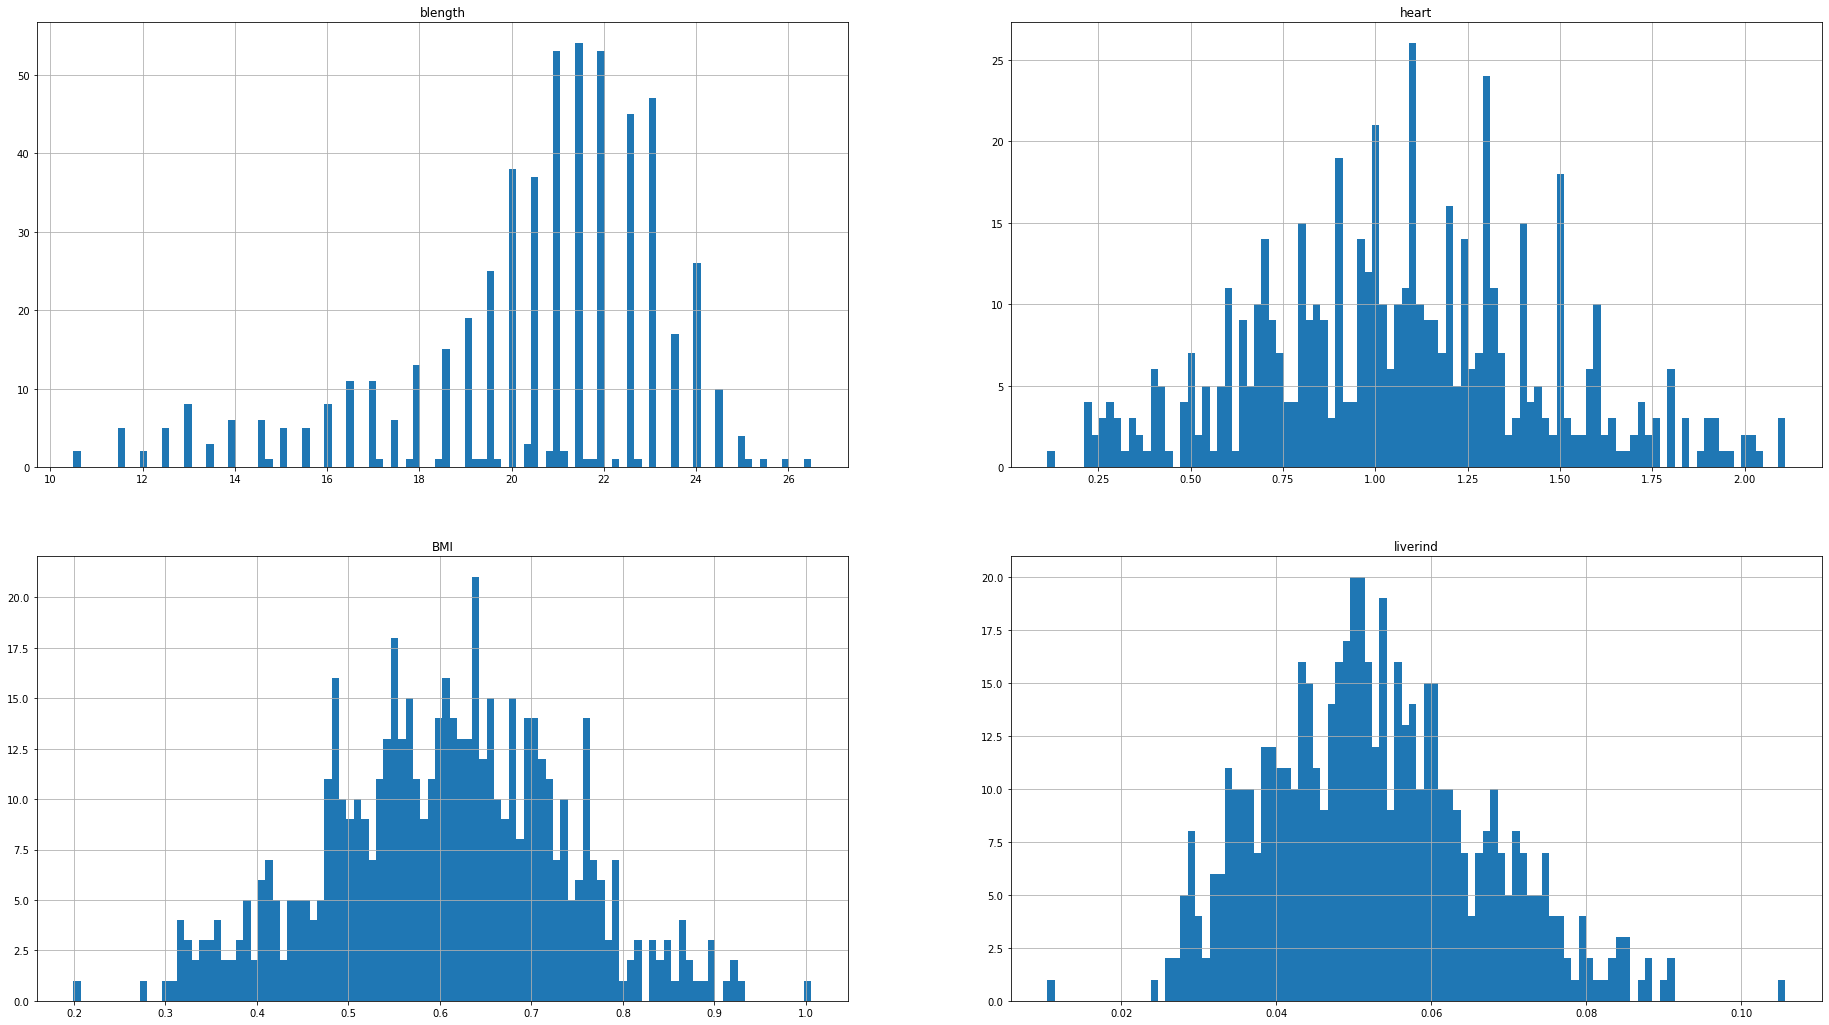

In [249]:
fig, ax = plt.subplots(figsize=(32,18))
plt.subplot(2,2,1)
data['blength'].hist(bins=100)
plt.title('blength')
plt.subplot(2,2,2)
data['heart'].hist(bins=100)
plt.title('heart')
plt.subplot(2,2,3)
data['BMI'].hist(bins=100)
plt.title('BMI')
plt.subplot(2,2,4)
data['liverind'].hist(bins=100)
plt.title('liverind')
plt.show()

b) Plot a histogram of feature ”day”. Identify visually two break
points that divide days into the “winter” and “summer” seasons.
You may need to try different numbers of bins to find good break
points in the spring and autumn. Note that 0 is a special value
and the new variable “season” will have three values: “freezer”,
“summer”, “winter” (no need to create the feature now, just know
how to do it).


Task 4b) Good break points (with no observations) for dividing the year
into winter and summer seasons are in spring between days 110-122, e.g., 115
and in autumn between 281-317, e.g., 300.


<AxesSubplot:>

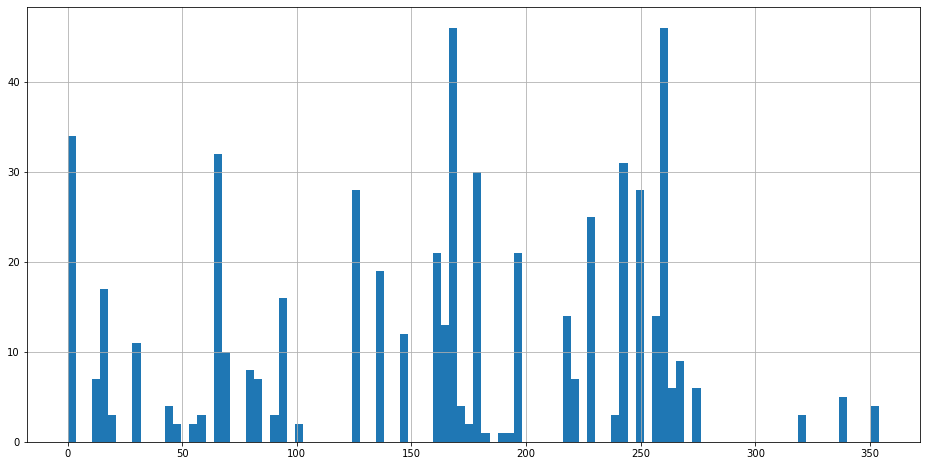

In [250]:
plt.subplots(figsize=(16,8))
data['day'].hist(bins=100)

## Imputation

Extra task on imputation: Before this task, remove rat183 that has an
erroneous heart measurement. Then remove temporarily heart measurements (heart weight and and heartind) of rat3, rat5 and rat6. The
original heart weights are 0.23, 0.23 and 0.26 and these will be compared to imputed values.

i) What is the mean value of remaining heart weights? This value is
used in the mean value imputation. Would it be sensible for these
rat puppies?

ii) Calculate the mean of remaining heartind values and multiply it
with the body weight of a rat to get an estimate for its heart
weight. Are the results any better?

iii) Try K-nearest neighbour imputation with different values of K.
Use Euclidean distance and calculate it over some or all numerical
(non-circular) features1. How accurate are the imputations now?

## Impute missing values

There are many ways to impute missing values

### Do nothing

If certain algorithm is tolerant to missing values or we want to use imput algorithms to impute missing values then nothing needs to be done. 

However, some algorithms are not tolerant to missing values and give errors. In this case, data records containing missing values needs to be removed or imputed.

### Imputation using most frequent or zero/constant values

This imputation method can be used on categorial data by replacing missing values with most frequent values in a feature.

### Imputation using mean/median values

This imputation method applies to numeric data by replacing missing values with mean/median of all non-missing values in a feature. Each feature is imputed separately and independently.

In this session, the dangers of blind imputation is explored.

In [251]:
# Sort data by weight feature
data = data.sort_values(by=['weight'])
data = data.reset_index(drop=True)
data[0:10]

,id,day,weight,gender,adrenal,liver,heart,appendix,femstate,gonfat,...,gonind,adrenalind,liverind,heartind,appendixind,gonfatind,batind,tailind,BMI,mother
0,rat1,67,22.0,1,10.0,0.8,0.112,0.3,4,0.000,...,0.000000,0.454545,0.036364,0.005091,0.013636,0.000000,0.001864,0.714286,0.199546,0
1,rat3,230,37.5,1,24.5,1.92,0.230,0.78,4,0.000,...,0.000000,0.653333,0.051200,0.006133,0.020800,0.000000,0.001467,0.904762,0.340136,0
2,rat6,169,40.0,1,23.0,2.29,0.260,0.56,4,0.000,...,0.000000,0.575000,0.057250,0.006500,0.014000,0.000000,0.002925,0.826087,0.302457,0
3,rat5,262,43.0,1,21.5,2.26,0.230,0.93,4,0.000,...,0.000000,0.500000,0.052558,0.005349,0.021628,0.000000,0.001884,0.720000,0.275200,0
4,rat4,261,45.0,2,11.7,2.13,0.250,4.73,,13.200,...,2.653242,0.260000,0.047333,0.005556,0.105111,0.293333,0.002178,0.869565,0.340265,0
5,rat9,162,46.0,1,20.0,2.64,0.270,0.65,4,0.000,...,0.000000,0.434783,0.057391,0.005870,0.014130,0.000000,0.001348,0.875000,0.319444,0
6,rat11,217,46.0,2,22.0,2.79,0.220,0.6,,0.057,...,0.055435,0.478261,0.060652,0.004783,0.013043,0.001239,0.001283,0.852174,0.347826,0
7,rat13,177,47.0,2,37.0,2.91,0.220,1.17,,0.000,...,0.000000,0.787234,0.061915,0.004681,0.024894,0.000000,0.001489,0.758333,0.326389,0
8,rat8,261,48.0,2,20.4,2.41,0.280,0.49,,0.089,...,0.085260,0.425000,0.050208,0.005833,0.010208,0.001854,0.003083,0.880000,0.307200,0
9,rat7,230,50.0,2,30.5,2.34,0.240,0.4,,0.140,...,0.131028,0.610000,0.046800,0.004800,0.008000,0.002800,0.001420,0.826087,0.378072,0


In [252]:
# save data
# data.to_csv("rats_v1_before_imputation.csv")

In [253]:
# Replace heart weight values at indices 1,2, and 3 with np.NaN. Small weight values are purposedly chosen to show goodness of different imputation methods
data.at[1, 'heart'] = np.NaN
data.at[2, 'heart'] = np.NaN
data.at[3, 'heart'] = np.NaN

data[['id','weight','heart']]

,id,weight,heart
0,rat1,22.0,0.112
1,rat3,37.5,NaN
2,rat6,40.0,NaN
3,rat5,43.0,NaN
4,rat4,45.0,0.250
...,...,...,...
556,rat298,465.0,1.030
557,rat299,470.0,1.060
558,rat472,475.0,2.100
559,rat577,476.0,2.040


In [254]:
# Import SimpleImputer from sklearn.impute and perform mean impute for those np.NaN values in heart feature

from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer( strategy='mean') #for median imputation replace 'mean' with 'median'
imp_mean.fit(data['heart'].to_frame())
data['heart'] = imp_mean.transform(data['heart'].to_frame())
data[['id','heart']][1:4]

,id,heart
1,rat3,1.073522
2,rat6,1.073522
3,rat5,1.073522


It is clearly shown that using blind imputation does not always provide good results. [1.07, 1.07, 1.07] are obtained using mean impute is very large compared to orginal deleted values of [0.23, 0.26, 0.23] 

One method to fix this issue is to use the normalized heart variable heartind and perform mean inpute on this derived feature

In [255]:
data.at[1, 'heartind'] = np.NaN
data.at[2, 'heartind'] = np.NaN
data.at[3, 'heartind'] = np.NaN

data[['id','heart','heartind']][1:4]

,id,heart,heartind
1,rat3,1.073522,NaN
2,rat6,1.073522,NaN
3,rat5,1.073522,NaN


In [256]:
imp_mean.fit(data['heartind'].to_frame())
data['heartind'] = imp_mean.transform(data['heartind'].to_frame())
data.loc[1:3,'heart'] = data['heartind'][1:4].astype(float) * data['weight'][1:4].astype(float)
data[['id','heart','heartind']][1:4]

,id,heart,heartind
1,rat3,0.156302,0.004168
2,rat6,0.166722,0.004168
3,rat5,0.179227,0.004168


In [ ]:
data

The obtained result [0.16, 0.17, 0.18] using normalized heartind feature is closer to the original values of [0.23, 0.26, 0.23] compared to using heart weight feature.

### Imputation using K-nearest neighbour imputation

The k-nearest neighbours (KNN) algorithm is a supervised algorithm that uses distances/ features similarity of k nearest neighbors to predict the values of any new data points. In this case, each neigbor out of k-nearest neighbors influence the value of a given data point.

This KNN can be used to impute missing values by finding the k’s nearest neighbours to the data row with missing values and then imputing them based on the non-missing values in the neighbourhood. 

In this exercise, impyute module from pip is used to do KNN impuation. For further reading: https://impyute.readthedocs.io/en/master/_modules/impyute/imputation/cs/fast_knn.html

In [257]:
# install impyute 
! pip install impyute

In [258]:
import sys
from impyute.imputation.cs import fast_knn
sys.setrecursionlimit(100000) #Increase the recursion limit of the OS

# Use features from columns ['BMI', 'weight', 'heart'], k-nearest neighbors = 2, p = 2 of Minkowski distance as default option for imputation

def knn_imputation(data, columns = ['BMI','weight', 'heart'], k = 30, p = 2, idx=[], impute_feature = 'heart'):
    
    for i in idx:
        data.at[i, impute_feature] = np.NaN
        
    df=fast_knn(data[columns].values.astype(float), k=k, p=p)
    imputed_df = pd.DataFrame(df, columns = columns)
       
    if(len(idx)>0):
        display(imputed_df.loc[idx,:])
    else:
        display(imputed_df)
        
    return imputed_df
    
imputed_data = knn_imputation(data, idx=[1,2,3])

,BMI,weight,heart
1,0.340136,37.5,0.377393
2,0.302457,40.0,0.377360
3,0.275200,43.0,0.385484


The obtained result [0.38, 0.38, 0.39] using K-nearest neighbour imputation are in this case further away from the original values of [0.23, 0.26, 0.23] than by using normalized mean impute.

The number of neighbors, used features and distance function will affect the results a lot. In the following experiment, used features and k number are changed to explore how these changes affect the imputation results.

In [259]:
# Increase used features
imputed_data = knn_imputation(data, columns = ['BMI', 'weight', 'heart',  'gender', 'adrenal', 'liver'], idx=[1,2,3])

,BMI,weight,heart,gender,adrenal,liver
1,0.340136,37.5,0.373011,1.0,24.5,1.92
2,0.302457,40.0,0.372143,1.0,23.0,2.29
3,0.275200,43.0,0.377463,1.0,21.5,2.26


In [260]:
# Decrease used features
imputed_data = knn_imputation(data, columns = ['weight', 'heart'], idx=[1,2,3])

,weight,heart
1,37.5,0.377393
2,40.0,0.377360
3,43.0,0.385484


In [261]:
# Use k = 5 (5 nearest neigbors)
imputed_data = knn_imputation(data, k = 5, idx=[1,2,3])

,BMI,weight,heart
1,0.340136,37.5,0.449323
2,0.302457,40.0,0.447026
3,0.275200,43.0,0.399640


The impyute fast_knn function call use Minkowski p-norm for distance. Parameter p can be modified to change the p-norm.

In the case of p=1, it is Manhattan distance. 

In the case of p=2, it is Euclidean distance. (default option)

The general form of Minskowski distance or L p-norm distance is defined as below

![Minkowski_distance](Minkowski_distance.PNG)

In [262]:
# Change the distance function to Hanhattan distance
imputed_data = knn_imputation(data, p = 1, idx=[1,2,3])

,BMI,weight,heart
1,0.340136,37.5,0.375754
2,0.302457,40.0,0.375509
3,0.275200,43.0,0.383108


In [263]:

data.at[1, 'heart'] = 0.23
data.at[2, 'heart'] = 0.26
data.at[3, 'heart'] = 0.23


In [ ]:
# save data
# data.to_csv("rats_v1_after_imputationn.csv")